# Proyecto Final Con PlusTi Priorizar fraudes repetidos en un mismo comercio
### Enfocar detección en comercios donde ha habido múltiples fraudes previos.
### Security Data Science
### Universidad del valle de Guatemala

Abner Ivan Garcia - 21285

In [52]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Cargamos el dataset

In [53]:
df = pd.read_csv("dataset_feature_engineering.csv", header=0)
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


#### Información del dataset y análisis exploratorio

In [54]:
df.shape

(1852394, 35)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

In [56]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,count_month_shopping_net,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,...,4.567241e+00,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,...,4.575502e+00,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,...,0.000000e+00,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,...,1.000000e+00,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,...,3.000000e+00,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,...,7.000000e+00,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,4.800000e+01,1.518682e+02,1.200000e+01,6.000000e+00,2.300000e+01,2.020000e+03,2.800000e+01,1.700000e+01,9.000000e+00,9.000000e+00


### ✅ 1.3 Verificar Rango de Fechas

In [57]:
print("Años disponibles:", df['year'].unique())
print("Meses disponibles:", df['trans_month'].unique())



Años disponibles: [2019 2020]
Meses disponibles: [ 1  2  3  4  5  6  7  8  9 10 11 12]


### ✅ 1.4 Análisis de la Variable Objetivo (is_fraud)

In [58]:
fraud_dist = df['is_fraud'].value_counts().rename({0: 'No Fraude', 1: 'Fraude'})
fraud_percent = (fraud_dist / fraud_dist.sum()) * 100

fraud_df = pd.DataFrame({
    'Cantidad': fraud_dist,
    'Porcentaje': fraud_percent.round(2)
})
fraud_df


,Cantidad,Porcentaje
is_fraud,,
No Fraude,1842743,99.48
Fraude,9651,0.52


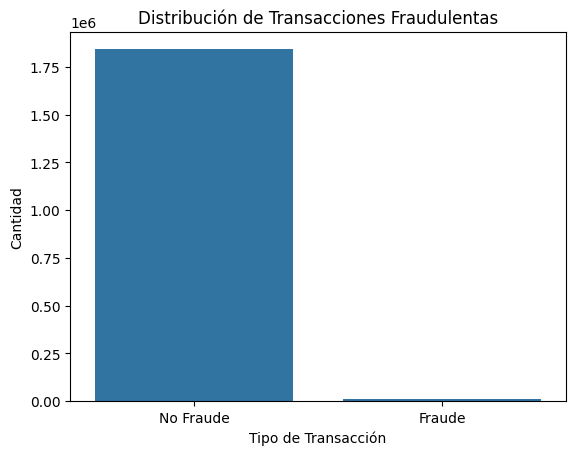

In [59]:
sns.countplot(x='is_fraud', data=df)
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.title("Distribución de Transacciones Fraudulentas")
plt.xlabel("Tipo de Transacción")
plt.ylabel("Cantidad")
plt.show()


### ✅ 1.5 Evolución del Fraude por Año

In [60]:
df_yearly = df.groupby(['year', 'is_fraud']).size().unstack().fillna(0)
df_yearly.columns = ['No Fraude', 'Fraude']
df_yearly['Total'] = df_yearly.sum(axis=1)
df_yearly['% Fraude'] = (df_yearly['Fraude'] / df_yearly['Total'] * 100).round(2)

df_yearly


,No Fraude,Fraude,Total,% Fraude
year,,,,
2019,919630,5220,924850,0.56
2020,923113,4431,927544,0.48


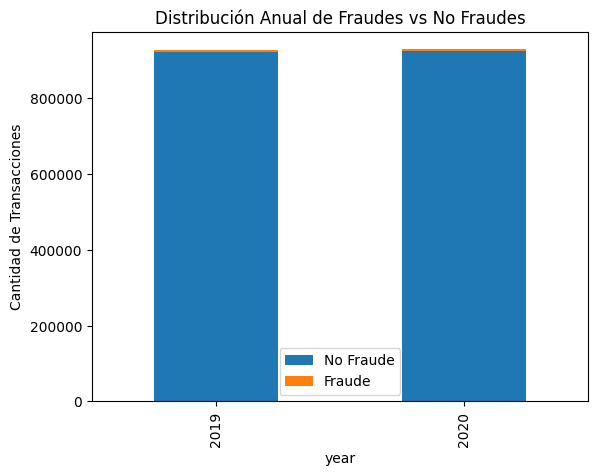

In [61]:
df_yearly[['No Fraude', 'Fraude']].plot(kind='bar', stacked=True)
plt.title("Distribución Anual de Fraudes vs No Fraudes")
plt.ylabel("Cantidad de Transacciones")
plt.show()


### ✅ 1.6 Análisis de top 10 Comercios Más Sospechosos en cada año

In [62]:
# Group fraudulent transactions by year and merchant
fraud_by_year = df[df['is_fraud'] == 1].groupby([df['year'], 'merchant'])['merchant'].count().reset_index(name='Cantidad de Fraudes')

# Get top 10 merchants for each year
top_merchants_by_year = fraud_by_year.sort_values(['year', 'Cantidad de Fraudes'], ascending=[True, False]).groupby('year').head(10)

# Display results for each year
for year in top_merchants_by_year['year'].unique():
    print(f"\nTop 10 Comercios con más fraudes en {year}:")
    year_data = top_merchants_by_year[top_merchants_by_year['year'] == year]
    print(year_data[['merchant', 'Cantidad de Fraudes']].to_string(index=False))    


Top 10 Comercios con más fraudes en 2019:
                merchant  Cantidad de Fraudes
      fraud_Hudson-Ratke                   37
       fraud_Kilback LLC                   35
      fraud_Rau and Sons                   33
       fraud_Cormier LLC                   32
fraud_Gleason-Macejkovic                   32
     fraud_Koepp-Witting                   32
          fraud_Kuhn LLC                   32
    fraud_Boyer-Reichert                   31
    fraud_Kiehn-Emmerich                   31
         fraud_Kuhic LLC                   31

Top 10 Comercios con más fraudes en 2020:
                            merchant  Cantidad de Fraudes
                     fraud_Doyle Ltd                   33
                     fraud_Kiehn Inc                   30
                   fraud_Kozey-Boehm                   30
fraud_Langworth, Boehm and Gulgowski                   29
      fraud_Moen, Reinger and Murphy                   29
               fraud_Kerluke-Abshire                   28
 f

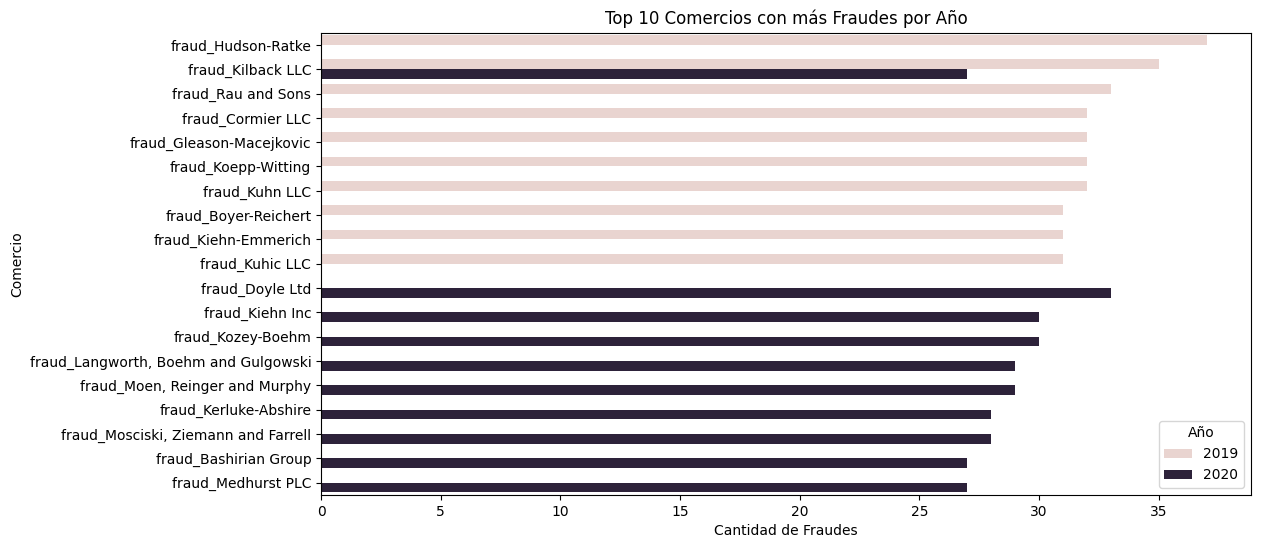

In [63]:
# Graficar los 10 comercios con más fraudes
top_merchants_by_year = top_merchants_by_year.sort_values(['year', 'Cantidad de Fraudes'], ascending=[True, False])
plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad de Fraudes', y='merchant', hue='year', data=top_merchants_by_year, dodge=True)
plt.title("Top 10 Comercios con más Fraudes por Año")
plt.xlabel("Cantidad de Fraudes")
plt.ylabel("Comercio")
plt.legend(title='Año')
plt.show()

# 🔍 1.7 Análisis de Distribución y Balanceo de Clases

### 📌 1.7.1 Distribución de la Variable Objetivo (is_fraud)

In [64]:
fraud_counts = df['is_fraud'].value_counts()
fraud_percentages = (fraud_counts / fraud_counts.sum()) * 100

balanceo_df = pd.DataFrame({
    'Clase': ['No Fraude', 'Fraude'],
    'Cantidad': fraud_counts.values,
    'Porcentaje (%)': fraud_percentages.round(2).values
})

balanceo_df


,Clase,Cantidad,Porcentaje (%)
0,No Fraude,1842743,99.48
1,Fraude,9651,0.52


C:\Users\Personal\AppData\Local\Temp\ipykernel_11020\2138708056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanceo_df['Clase'], y=balanceo_df['Cantidad'], palette='viridis')


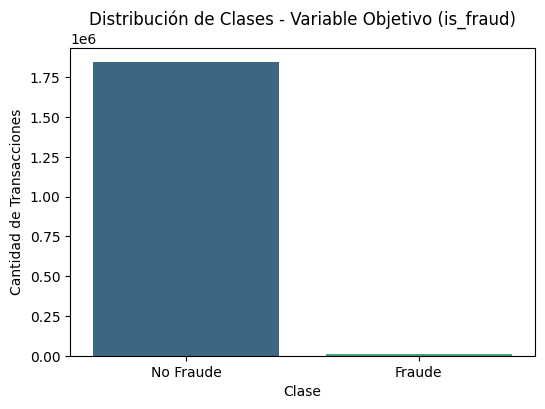

In [65]:
plt.figure(figsize=(6,4))
sns.barplot(x=balanceo_df['Clase'], y=balanceo_df['Cantidad'], palette='viridis')
plt.title('Distribución de Clases - Variable Objetivo (is_fraud)')
plt.ylabel('Cantidad de Transacciones')
plt.show()


### 📌 1.7.2 Distribución de Transacciones por Categoría (category) y Fraude

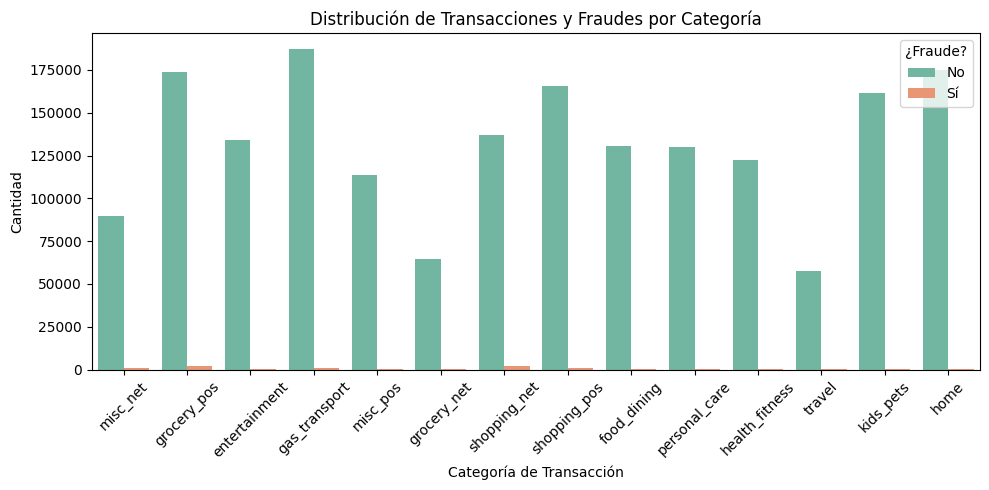

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x='category', data=df, hue='is_fraud', palette='Set2')
plt.title('Distribución de Transacciones y Fraudes por Categoría')
plt.xticks(rotation=45)
plt.xlabel('Categoría de Transacción')
plt.ylabel('Cantidad')
plt.legend(title='¿Fraude?', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()


### 📌 1.7.3 Distribución de amount según tipo de transacción

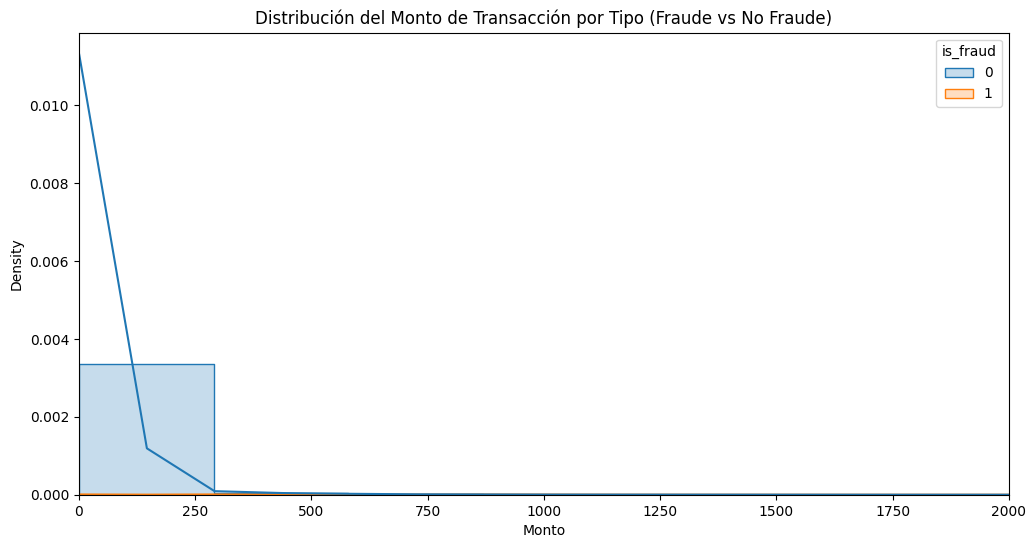

In [67]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=100, kde=True, element='step', stat='density')
plt.title('Distribución del Monto de Transacción por Tipo (Fraude vs No Fraude)')
plt.xlabel('Monto')
plt.xlim(0, 2000)  # Limita para ver mejor los datos (ajustable)
plt.show()


Se puede observar que la gran mayoría de las transacciones legítimas (representadas en azul) tienden a tener montos más bajos, concentrándose principalmente por debajo de los 250. En contraste, las transacciones fraudulentas (representadas en naranja) parecen estar aún más concentradas en montos muy pequeños, casi cercanos a cero, según la densidad mostrada.

### 📌 1.7.4 Balanceo de clases en conjunto de entrenamiento/test

In [68]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Mostrar distribución
pd.DataFrame({
    'Train': y_train.value_counts(normalize=True).round(4),
    'Test': y_test.value_counts(normalize=True).round(4)
})


,Train,Test
is_fraud,,
0,0.9948,0.9948
1,0.0052,0.0052


### 📌 1.8 Vista de fraudes por mes, día y hora

In [ ]:
# Eliminar diciembre 2020 del análisis
df_sin_diciembre = df[~((df['fecha'].dt.year == 2020) & (df['fecha'].dt.month == 12))]

# FRAUDES POR DÍA DEL MES
fraudes_por_dia = df_sin_diciembre[df_sin_diciembre['is_fraud'] == 1].groupby(df_sin_diciembre['fecha'].dt.day).size()

# FRAUDES POR HORA DEL DÍA 
fraudes_por_hora = df_sin_diciembre[df_sin_diciembre['is_fraud'] == 1].groupby(df_sin_diciembre['fecha'].dt.hour).size()


# FRAUDES POR MES - agrupando por el número de mes y extrayendo solo el nombre del mes
df_sin_diciembre['mes_nombre'] = df_sin_diciembre['fecha'].dt.month_name()

# FRAUDES POR MES (sin diciembre 2020) - agrupando por nombre de mes
fraudes_por_mes = df_sin_diciembre[df_sin_diciembre['is_fraud'] == 1].groupby('mes_nombre').size()

# Reordenar los meses cronológicamente (en lugar de alfabéticamente)
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
fraudes_por_mes = fraudes_por_mes.reindex(orden_meses)

# Gráfico: Fraudes por mes
plt.figure(figsize=(12, 5))
fraudes_por_mes.plot(kind='bar', color='salmon')
plt.title('Fraudes por Mes Acumulado (excluyendo diciembre 2020)')
plt.xlabel('Mes')
plt.ylabel('Número de fraudes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico: Fraudes por día del mes
plt.figure(figsize=(10, 5))
fraudes_por_dia.plot(kind='bar', color='steelblue')
plt.title('Fraudes por Día del Mes (acumulado global)')
plt.xlabel('Día del mes')
plt.ylabel('Número de fraudes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico: Fraudes por hora del día
plt.figure(figsize=(10, 5))
fraudes_por_hora.plot(kind='bar', color='forestgreen')
plt.title('Fraudes por Hora del Día')
plt.xlabel('Hora del día')
plt.ylabel('Número de fraudes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

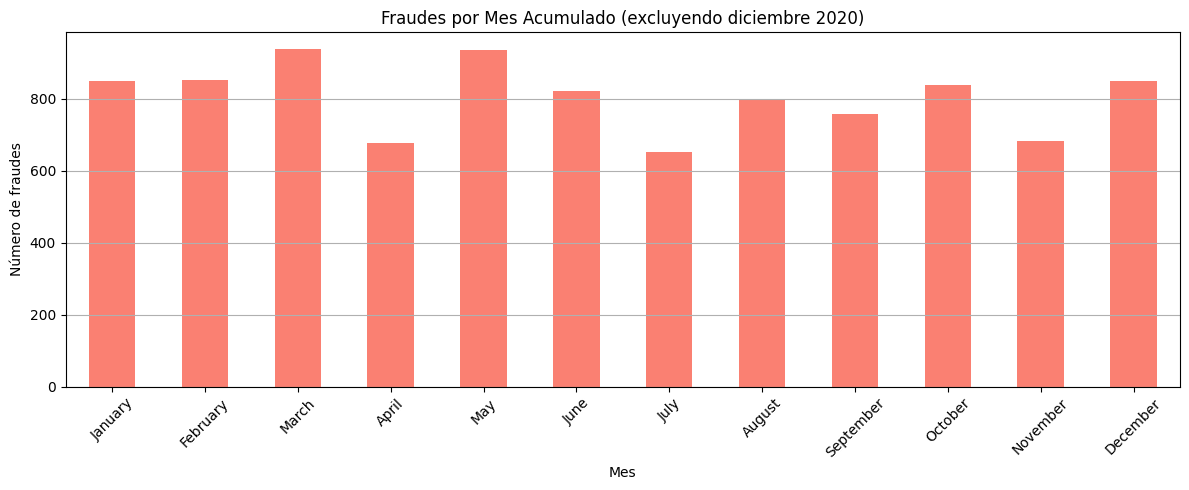

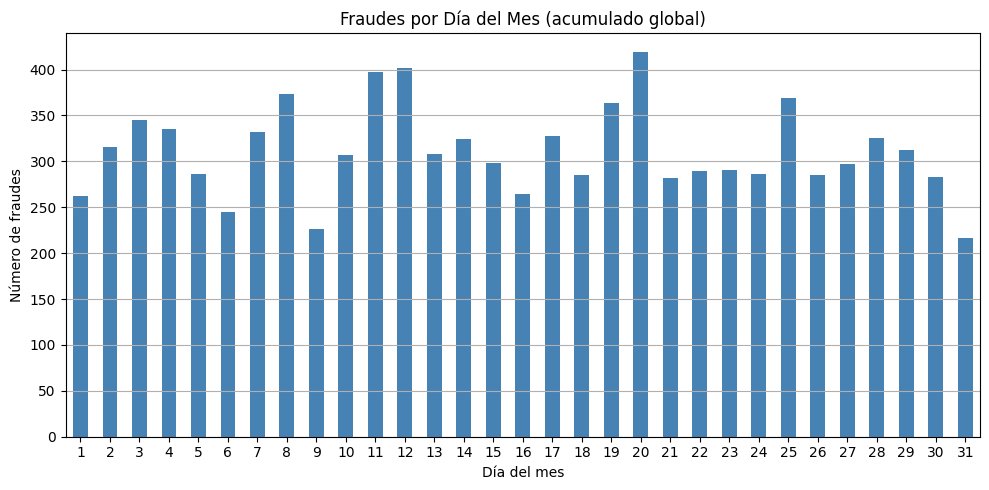

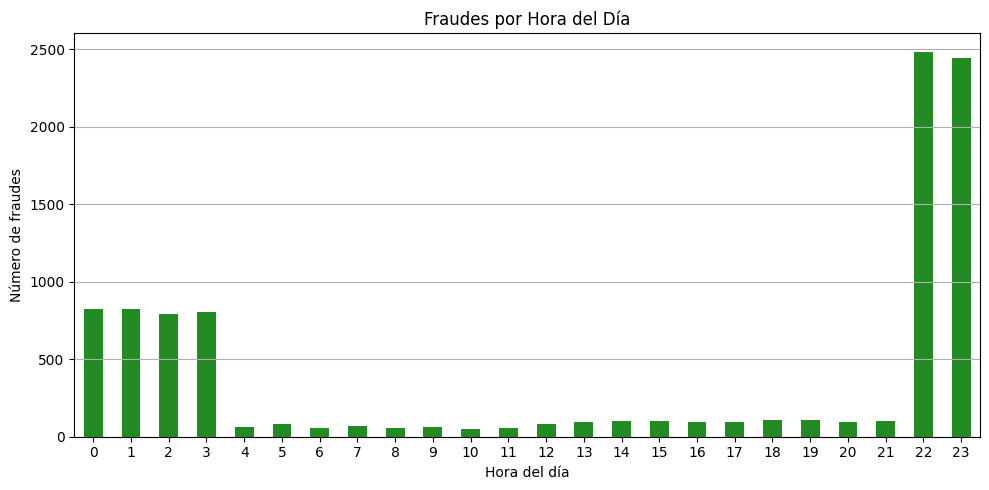

# 🛠️ 2. Ingeniería de Variables

### 🎯 Objetivo:
Crear variables que capturen el historial de fraude por comercio, y que nos permitan priorizar aquellos comercios con antecedentes fraudulentos, así como otras variables contextuales que puedan enriquecer el modelo.

### ✅ 2.1 Conteo histórico de fraudes por comercio

📌 Interpretación:
Esta columna nos dice cuántos fraudes anteriores ha tenido ese comercio antes de esta transacción. Si el valor es alto, podría ser un indicador de riesgo.

In [69]:
# Ordenar el dataset por tiempo para mantener la secuencia temporal
df = df.sort_values(by=['unix_time', 'merchant'])

# Crear variable acumulada de fraudes por merchant 
df['fraudes_previos_en_merchant'] = df.groupby('merchant').is_fraud.cumsum() - df.is_fraud

# Para verificar los resultados
print("Primeras filas con los fraudes previos:")
print(df[['merchant', 'is_fraud', 'fraudes_previos_en_merchant']].head(10))

Primeras filas con los fraudes previos:
                             merchant  is_fraud  fraudes_previos_en_merchant
0          fraud_Rippin, Kub and Mann         0                            0
1     fraud_Heller, Gutmann and Zieme         0                            0
2                fraud_Lind-Buckridge         0                            0
3  fraud_Kutch, Hermiston and Farrell         0                            0
4                 fraud_Keeling-Crist         0                            0
5    fraud_Stroman, Hudson and Erdman         0                            0
6               fraud_Rowe-Vandervort         0                            0
7                fraud_Corwin-Collins         0                            0
8                    fraud_Herzog Ltd         0                            0
9   fraud_Schoen, Kuphal and Nitzsche         0                            0


### ✅ 2.2 Flag binario: ¿Este comercio ha tenido algún fraude antes?
📌 Interpretación:
Este es un indicador binario (0/1) que refleja si el comercio ya tiene antecedentes de fraude.

0 = no tiene antecedentes de fraude

1 = si tiene antecedentes de fraude

In [70]:
df['merchant_con_historial_fraude'] = (df['fraudes_previos_en_merchant'] > 0).astype(int)
# Verificar la creación de la nueva variable
print("Primeras filas con la nueva variable de historial de fraude:")
print(df[['merchant', 'is_fraud', 'fraudes_previos_en_merchant', 'merchant_con_historial_fraude']].head(10))


Primeras filas con la nueva variable de historial de fraude:
                             merchant  is_fraud  fraudes_previos_en_merchant  \
0          fraud_Rippin, Kub and Mann         0                            0   
1     fraud_Heller, Gutmann and Zieme         0                            0   
2                fraud_Lind-Buckridge         0                            0   
3  fraud_Kutch, Hermiston and Farrell         0                            0   
4                 fraud_Keeling-Crist         0                            0   
5    fraud_Stroman, Hudson and Erdman         0                            0   
6               fraud_Rowe-Vandervort         0                            0   
7                fraud_Corwin-Collins         0                            0   
8                    fraud_Herzog Ltd         0                            0   
9   fraud_Schoen, Kuphal and Nitzsche         0                            0   

   merchant_con_historial_fraude  
0                      

### ✅ 2.3 Ratio de fraudes por comercio (histórico hasta la transacción)
📌 Interpretación:
Esta variable expresa la proporción histórica de fraudes en un comercio. Útil para ver si, aunque haya muchos fraudes, también hay muchas transacciones (lo que podría suavizar el impacto).

In [71]:
# Calcular número total de transacciones por comercio hasta el momento
df['transacciones_previas_en_merchant'] = (
    df.groupby('merchant')
    .cumcount()
)

# Evitar división por cero
df['ratio_fraudes_en_merchant'] = np.where(
    df['transacciones_previas_en_merchant'] > 0,
    df['fraudes_previos_en_merchant'] / df['transacciones_previas_en_merchant'],
    0
)


### ✅ 2.4 Tiempo desde el último fraude en el comercio

📌 Interpretación:
Esta columna nos muestra cuánto tiempo ha pasado desde el último fraude en ese comercio. Si es muy reciente, puede ser más riesgoso.

In [72]:
# Ordenar el dataframe por tiempo y comercio
df = df.sort_values(['unix_time', 'merchant'])

# Crear marca de tiempo para transacciones fraudulentas
df['timestamp_fraude'] = df['unix_time'].where(df['is_fraud'] == 1)

# Calcular último fraude por comercio
df['ultimo_fraude_en_merchant'] = df.groupby('merchant')['timestamp_fraude'].transform(lambda x: x.ffill().shift())

# Calcular tiempo desde último fraude (en días para mejor interpretación)
df['dias_desde_ultimo_fraude'] = (df['unix_time'] - df['ultimo_fraude_en_merchant']) / (24 * 3600)

# Redondear a días enteros para mejor interpretación
df['dias_desde_ultimo_fraude'] = df['dias_desde_ultimo_fraude'].round(0).astype('Int64')

df['dias_desde_ultimo_fraude'] = df['dias_desde_ultimo_fraude'].fillna(-1) # -1 indica que no hubo fraudes previos en el comercio

# Mostrar solo transacciones fraudulentas para verificar
print("Ejemplo de transacciones fraudulentas:")
print(df[df['is_fraud']==1][['merchant', 'is_fraud', 'timestamp_fraude', 
                             'ultimo_fraude_en_merchant', 'dias_desde_ultimo_fraude']].head())

Ejemplo de transacciones fraudulentas:
                              merchant  is_fraud  timestamp_fraude  \
2449            fraud_Rutherford-Mertz         1      1.325466e+09   
2472  fraud_Jenkins, Hauck and Friesen         1      1.325469e+09   
2523            fraud_Goodwin-Nitzsche         1      1.325474e+09   
2546            fraud_Erdman-Kertzmann         1      1.325475e+09   
2553                fraud_Koepp-Parker         1      1.325477e+09   

      ultimo_fraude_en_merchant  dias_desde_ultimo_fraude  
2449                        NaN                        -1  
2472                        NaN                        -1  
2523                        NaN                        -1  
2546                        NaN                        -1  
2553                        NaN                        -1  


### ✅ 2.5 ¿Este usuario ya hizo fraude antes?
Podemos capturar si el número de fraudes históricos por tarjeta de crédito (cc_num) también está asociado a riesgo.

In [73]:
# Ordenar el dataframe por tiempo y número de tarjeta
df = df.sort_values(['unix_time', 'cc_num'])

# Calcular fraudes previos por usuario usando transform
df['fraudes_previos_usuario'] = df.groupby('cc_num')['is_fraud'].transform(lambda x: x.shift().cumsum().fillna(0))

# Crear indicador de usuario con historial de fraude
df['usuario_con_historial_fraude'] = (df['fraudes_previos_usuario'] > 0).astype(int)

# Verificar resultados
print("Ejemplo de resultados:")
print(df[['cc_num', 'is_fraud', 'fraudes_previos_usuario', 'usuario_con_historial_fraude']].head(10))

Ejemplo de resultados:
             cc_num  is_fraud  fraudes_previos_usuario  \
0  2703186189652095         0                      0.0   
1      630423337322         0                      0.0   
2    38859492057661         0                      0.0   
3  3534093764340240         0                      0.0   
4   375534208663984         0                      0.0   
5  4767265376804500         0                      0.0   
6    30074693890476         0                      0.0   
7  6011360759745864         0                      0.0   
8  4922710831011201         0                      0.0   
9  2720830304681674         0                      0.0   

   usuario_con_historial_fraude  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
5                             0  
6                             0  
7                             0  
8                             0 

### ✅ 2.6 Frecuencia de compras en el comercio por cliente (acumulador)
Esto nos ayuda a saber si el cliente suele comprar ahí (fidelidad).

In [74]:
# columna 'compras_previas_en_merchant_usuario' que cuenta el número de compras previas por usuario en cada comercio
df['compras_previas_en_merchant_usuario'] = (
    df.groupby(['cc_num', 'merchant']).cumcount()
)


### ✅ 2.7 ¿Primera vez que el usuario compra en este comercio?

In [75]:
# Calcular el tiempo desde la primera compra en el comercio
df['primera_vez_en_merchant'] = (df['compras_previas_en_merchant_usuario'] == 0).astype(int)
# 0 nos indica que es la primera vez que el usuario compra en ese comercio, 
# y 1 indica que ya ha comprado antes.


### 🧾 Visualización rápida de las nuevas variables

In [76]:
df[['merchant', 'is_fraud', 'fraudes_previos_en_merchant', 'merchant_con_historial_fraude',
    'ratio_fraudes_en_merchant', 'dias_desde_ultimo_fraude',
    'fraudes_previos_usuario', 'usuario_con_historial_fraude',
    'compras_previas_en_merchant_usuario', 'primera_vez_en_merchant']].head(10)


,merchant,is_fraud,fraudes_previos_en_merchant,merchant_con_historial_fraude,ratio_fraudes_en_merchant,dias_desde_ultimo_fraude,fraudes_previos_usuario,usuario_con_historial_fraude,compras_previas_en_merchant_usuario,primera_vez_en_merchant
0,"fraud_Rippin, Kub and Mann",0,0,0,0.0,-1,0.0,0,0,1
1,"fraud_Heller, Gutmann and Zieme",0,0,0,0.0,-1,0.0,0,0,1
2,fraud_Lind-Buckridge,0,0,0,0.0,-1,0.0,0,0,1
3,"fraud_Kutch, Hermiston and Farrell",0,0,0,0.0,-1,0.0,0,0,1
4,fraud_Keeling-Crist,0,0,0,0.0,-1,0.0,0,0,1
5,"fraud_Stroman, Hudson and Erdman",0,0,0,0.0,-1,0.0,0,0,1
6,fraud_Rowe-Vandervort,0,0,0,0.0,-1,0.0,0,0,1
7,fraud_Corwin-Collins,0,0,0,0.0,-1,0.0,0,0,1
8,fraud_Herzog Ltd,0,0,0,0.0,-1,0.0,0,0,1
9,"fraud_Schoen, Kuphal and Nitzsche",0,0,0,0.0,-1,0.0,0,0,1


### 🧾 Visualización rápida de las nuevas variables y ejemplos que son fraudes

In [77]:
# mostrar las nuevas variables creadas con el método de ingeniería de características y mostrar las primeras filas que son fraudes
print("Ejemplo de transacciones fraudulentas con nuevas variables:")
df[df['is_fraud'] == 1][['merchant', 'is_fraud', 'fraudes_previos_en_merchant',
                                'merchant_con_historial_fraude', 'ratio_fraudes_en_merchant',
                                'dias_desde_ultimo_fraude', 'fraudes_previos_usuario',
                                'usuario_con_historial_fraude', 'compras_previas_en_merchant_usuario',
                                'primera_vez_en_merchant']].head(50)

Ejemplo de transacciones fraudulentas con nuevas variables:


,merchant,is_fraud,fraudes_previos_en_merchant,merchant_con_historial_fraude,ratio_fraudes_en_merchant,dias_desde_ultimo_fraude,fraudes_previos_usuario,usuario_con_historial_fraude,compras_previas_en_merchant_usuario,primera_vez_en_merchant
2449,fraud_Rutherford-Mertz,1,0,0,0.000000,-1,0.0,0,0,1
2472,"fraud_Jenkins, Hauck and Friesen",1,0,0,0.000000,-1,0.0,0,0,1
2523,fraud_Goodwin-Nitzsche,1,0,0,0.000000,-1,1.0,1,0,1
2546,fraud_Erdman-Kertzmann,1,0,0,0.000000,-1,1.0,1,0,1
2553,fraud_Koepp-Parker,1,0,0,0.000000,-1,2.0,1,0,1
2937,fraud_Medhurst PLC,1,0,0,0.000000,-1,2.0,1,0,1
3527,fraud_Ruecker Group,1,0,0,0.000000,-1,3.0,1,0,1
3580,fraud_Conroy-Cruickshank,1,0,0,0.000000,-1,3.0,1,0,1
3600,fraud_Koepp-Parker,1,1,1,0.111111,1,4.0,1,1,0
3671,fraud_Strosin-Cruickshank,1,0,0,0.000000,-1,5.0,1,0,1


# Modelo Base

In [80]:
from sklearn.preprocessing import LabelEncoder

# Seleccionar las columnas categóricas que contienen texto
categorical_cols = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convertir a string antes de aplicar el codificador

# Verificar que todas las columnas categóricas han sido convertidas a numéricas
print(df[categorical_cols].head())


   merchant  category  first  last  gender  street  city  state  job  dob  \
0       514         8    164    18       0     576   532     27  372  791   
1       241         4    312   161       0     439   619     47  431  619   
2       390         0    116   386       1     610   474     13  308  309   
3       360         2    165   468       1     945    84     26  330  405   
4       297         9    339   153       1     422   217     45  116  746   

   trans_num  
0      80326  
1     227462  
2    1169030  
3     777909  
4    1186866  


## Construyendo el modelo base

Años disponibles: [2019 2020]
Distribución en train: is_fraud
0    0.9944
1    0.0056
Name: proportion, dtype: float64
Distribución en test: is_fraud
0    0.9952
1    0.0048
Name: proportion, dtype: float64
Entrenando modelo...
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[199]	valid_0's auc: 0.993985

Métricas del modelo:
AUC ROC: 0.9940
F1 Score: 0.7187
Accuracy: 0.9970

Matriz de Confusión:
[[921121   1992]
 [   828   3603]]

Ratio de Falsos Positivos: 1.5529

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    923113
           1       0.64      0.81      0.72      4431

    accuracy                           1.00    927544
   macro avg       0.82      0.91      0.86    927544
weighted avg       1.00      1.00      1.00    927544



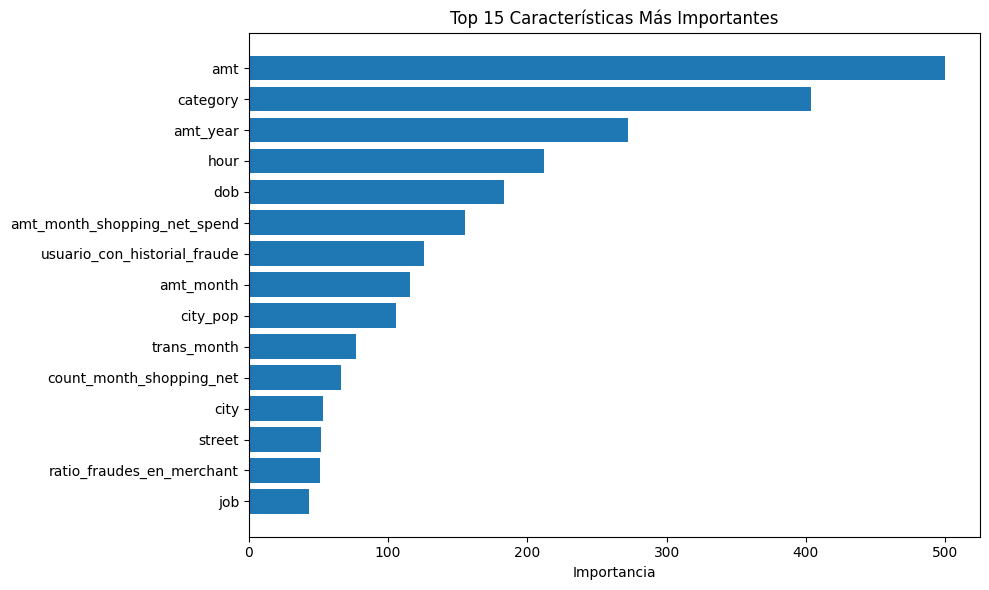

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix, classification_report
import numpy as np

# 1. Eliminar columnas con fuga de datos
columns_to_drop = [
    'cc_num', 'unix_time', 'timestamp_fraude', 'ultimo_fraude_en_merchant', 
    'fraudes_previos_usuario' 
]

# 2. Dividir los datos por año para asegurar una evaluación más realista
# Esta es una mejor práctica para datos temporales
print("Años disponibles:", df['year'].unique())

# Usar datos de un año para entrenar y el siguiente para probar
train_years = [2019]  # Ajusta según los años disponibles en tus datos
test_years = [2020]   # Ajusta según los años disponibles en tus datos

X_train = df[df['year'].isin(train_years)].drop(columns=['is_fraud'] + columns_to_drop) # Eliminar la variable objetivo y las columnas a eliminar
y_train = df[df['year'].isin(train_years)]['is_fraud'] # Variable objetivo 

X_test = df[df['year'].isin(test_years)].drop(columns=['is_fraud'] + columns_to_drop) # Eliminar la variable objetivo y las columnas a eliminar
y_test = df[df['year'].isin(test_years)]['is_fraud'] # Variable objetivo

print(f"Distribución en train: {y_train.value_counts(normalize=True).round(4)}")
print(f"Distribución en test: {y_test.value_counts(normalize=True).round(4)}")

# 3. Crear dataset LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 4. Parámetros con mayor regularización para evitar sobreajuste
params = {
    'objective': 'binary', # nos indica que es un problema de clasificación binaria
    'metric': 'auc', # nos indica que la métrica a utilizar es el área bajo la curva ROC
    'boosting_type': 'gbdt', # nos indica que el tipo de boosting a utilizar es el Gradient Boosting Decision Tree
    'num_leaves': 15,        # Número de hojas en el árbol, ajustado para evitar sobreajuste       
    'max_depth': 5,            # Profundidad máxima del árbol, ajustado para evitar sobreajuste
    'learning_rate': 0.05,     # Tasa de aprendizaje, ajustada para evitar sobreajuste
    'feature_fraction': 0.7,   # Submuestreo de características
    'bagging_fraction': 0.7,   # Submuestreo de datos 
    'min_child_samples': 50,   # Número mínimo de muestras en una hoja
    'reg_alpha': 0.5,          # Regularización L1 
    'reg_lambda': 0.5,         # Regularización L2 
    'min_split_gain': 0.1      # Ganancia mínima para dividir
}

# 5. Entrenar con verificación explícita de early stopping
callbacks = [lgb.early_stopping(stopping_rounds=30, verbose=True)]  # Incrementado stopping_rounds

print("Entrenando modelo...")
model = lgb.train(
    params,  # parámetros del modelo
    train_data,  # datos de entrenamiento
    num_boost_round=200, # número máximo de iteraciones 
    valid_sets=[test_data],  # datos de validación 
    callbacks=callbacks # callbacks para early stopping
)

# 6. Evaluar modelo
y_pred_prob = model.predict(X_test) # Probabilidades de predicción 
y_pred = (y_pred_prob > 0.5).astype(int) # Predicciones binarias

# 7. Calcular métricas
auc_roc = roc_auc_score(y_test, y_pred_prob) # Área bajo la curva ROC
f1 = f1_score(y_test, y_pred) # F1 Score 
accuracy = accuracy_score(y_test, y_pred) # Exactitud

# 8. Mostrar resultados
print(f"\nMétricas del modelo:")
print(f"AUC ROC: {auc_roc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# 9. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# 10. Ratio de falsos positivos
tn, fp, fn, tp = cm.ravel() # Desempaquetar la matriz de confusión 
ratio_falsos_positivos = (tp + fp) / tp if tp > 0 else float('inf') # aplicar la fórmula para calcular el ratio de falsos positivos
print(f"\nRatio de Falsos Positivos: {ratio_falsos_positivos:.4f}") 

# 11. Reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 12. Visualizar importancia de características
feature_importance = pd.DataFrame({
    'Feature': model.feature_name(), # nombre de las características 
    'Importance': model.feature_importance() # importancia de las características
})
top_features = feature_importance.sort_values('Importance', ascending=False).head(15) # tomar las 15 características más importantes

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1])
plt.xlabel('Importancia')
plt.title('Top 15 Características Más Importantes')
plt.tight_layout()
plt.show()

# Definición de métricas personalizadas

In [96]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# 1. Definir métricas personalizadas para LightGBM

def feval_fp_ratio(y_pred, dtrain):
    """
    Métrica personalizada que calcula ratio de falsos positivos = (TP + FP) / TP
    Un valor más bajo es mejor (indica menos FP por cada TP).
    """
    y_true = dtrain.get_label()
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Calcular matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    
    # Calcular ratio de falsos positivos (evitar división por cero)
    if tp > 0:
        fp_ratio = (tp + fp) / tp
    else:
        fp_ratio = float('inf')  # Penalización extrema si no hay TPs
    
    # Mayor es peor para LightGBM, por lo que devolvemos el ratio directamente
    return 'fp_ratio', fp_ratio, False

def feval_balanced_metric(y_pred, dtrain):
    """
    Métrica balanceada: combina AUC ROC con una penalización por falsos positivos
    Fórmula: AUC - alpha * (FP / (FP + TN))
    Un valor más alto es mejor.
    """
    y_true = dtrain.get_label()
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Calcular AUC
    auc = roc_auc_score(y_true, y_pred)
    
    # Calcular tasa de falsos positivos
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    # Parámetro para ajustar la importancia de los falsos positivos
    alpha = 0.5
    
    # Combinar métricas (AUC - penalización por FP)
    balanced_score = auc - (alpha * fp_rate)
    
    # Mayor es mejor para esta métrica
    return 'balanced', balanced_score, True

def feval_precision_weighted_recall(y_pred, dtrain):
    """
    Métrica que prioriza la precisión sobre el recall para minimizar falsos positivos
    Formula: beta * precision + (1-beta) * recall, donde beta > 0.5 da más peso a precision
    """
    y_true = dtrain.get_label()
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    precision = precision_score(y_true, y_pred_binary, zero_division=0)
    recall = recall_score(y_true, y_pred_binary, zero_division=0)
    
    # Dar más peso a la precisión (reducir falsos positivos)
    beta = 0.7
    weighted_score = beta * precision + (1-beta) * recall
    
    return 'prec_weighted', weighted_score, True

def feval_f_beta_score(y_pred, dtrain):
    """
    F-beta score con beta < 1 para dar más importancia a la precisión que al recall
    Un valor más alto es mejor.
    """
    y_true = dtrain.get_label()
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Beta < 1 da más importancia a precisión (reduce FP)
    beta = 0.5
    beta_squared = beta ** 2
    
    precision = precision_score(y_true, y_pred_binary, zero_division=0)
    recall = recall_score(y_true, y_pred_binary, zero_division=0)
    
    if precision + recall > 0:
        f_beta = (1 + beta_squared) * (precision * recall) / ((beta_squared * precision) + recall)
    else:
        f_beta = 0.0
    
    return 'f_beta', f_beta, True


In [97]:
# 2. Entrenar modelo con las métricas personalizadas

# Función para evaluar todas las métricas después del entrenamiento
def evaluate_all_metrics(y_true, y_pred_prob, threshold=0.5):
    """Evalúa el modelo con múltiples métricas incluyendo las personalizadas"""
    y_pred = (y_pred_prob > threshold).astype(int)
    
    # Métricas estándar
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    auc_roc = roc_auc_score(y_true, y_pred_prob)
    
    # Métricas personalizadas
    fp_ratio = (tp + fp) / tp if tp > 0 else float('inf')
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    beta = 0.5
    beta_squared = beta ** 2
    f_beta = (1 + beta_squared) * (precision * recall) / ((beta_squared * precision) + recall) if (precision + recall) > 0 else 0
    balanced = auc_roc - (0.5 * fp_rate)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'fp_ratio': fp_ratio,
        'fp_rate': fp_rate,
        'f_beta': f_beta,
        'balanced_metric': balanced,
        'confusion_matrix': confusion_matrix(y_true, y_pred),
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'tn': tn
    }

In [98]:
# 3. Entrenar modelos con diferentes métricas personalizadas y comparar resultados

# Primer modelo: optimizando para minimizar ratio de falsos positivos
print("\n=== Modelo optimizado para minimizar ratio de falsos positivos ===")
params_fp_ratio = params.copy()
params_fp_ratio['metric'] = 'none'  # Desactivar métricas por defecto

model_fp_ratio = lgb.train(
    params=params_fp_ratio,
    train_set=train_data,
    num_boost_round=200,
    valid_sets=[test_data],
    feval=feval_fp_ratio,
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True)]
)

# Segundo modelo: optimizando para métrica balanceada
print("\n=== Modelo optimizado para métrica balanceada ===")
params_balanced = params.copy()
params_balanced['metric'] = 'none'

model_balanced = lgb.train(
    params=params_balanced,
    train_set=train_data,
    num_boost_round=200,
    valid_sets=[test_data],
    feval=feval_balanced_metric,
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True)]
)

# Tercer modelo: optimizando para F-beta score (precisión > recall)
print("\n=== Modelo optimizado para F-beta score ===")
params_f_beta = params.copy()
params_f_beta['metric'] = 'none'

model_f_beta = lgb.train(
    params=params_f_beta,
    train_set=train_data,
    num_boost_round=200,
    valid_sets=[test_data],
    feval=feval_f_beta_score,
    callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=True)]
)


=== Modelo optimizado para minimizar ratio de falsos positivos ===
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's fp_ratio: 1.37003

=== Modelo optimizado para métrica balanceada ===
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[199]	valid_0's balanced: 0.992906

=== Modelo optimizado para F-beta score ===
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's f_beta: 0.719667


In [99]:
# 4. Comparar los resultados de los diferentes modelos
models = {
    'Base (AUC)': model,
    'FP Ratio': model_fp_ratio,
    'Balanced': model_balanced,
    'F-beta': model_f_beta
}

# Tabla para comparar todos los modelos
results = []
for name, model in models.items():
    y_pred_prob = model.predict(X_test)
    metrics = evaluate_all_metrics(y_test, y_pred_prob)
    
    results.append({
        'Model': name,
        'AUC': metrics['auc_roc'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1': metrics['f1_score'],
        'FP Ratio': metrics['fp_ratio'],
        'TP': metrics['tp'],
        'FP': metrics['fp'],
        'FN': metrics['fn']
    })

# Mostrar tabla de resultados
results_df = pd.DataFrame(results)
print("\n=== Comparación de Modelos ===")
print(results_df)



=== Comparación de Modelos ===
        Model       AUC  Precision    Recall        F1  FP Ratio    TP    FP  \
0  Base (AUC)  0.993985   0.643968  0.813135  0.718731  1.552873  3603  1992   
1    FP Ratio  0.984166   0.729913  0.680659  0.704426  1.370027  3016  1116   
2    Balanced  0.993985   0.643968  0.813135  0.718731  1.552873  3603  1992   
3      F-beta  0.986833   0.722889  0.707064  0.714889  1.383339  3133  1201   

     FN  
0   828  
1  1415  
2   828  
3  1298  


In [100]:
# 5. Optimización del umbral de decisión para cada modelo
print("\n=== Optimización del umbral de decisión ===")
thresholds = np.arange(0.1, 0.95, 0.05)

# Seleccionar el mejor modelo según los resultados
best_model_name = input("Seleccione el modelo para optimizar el umbral (Base, FP Ratio, Balanced, F-beta): ")
best_model = models.get(best_model_name, model)  # Default to base model if not found

y_pred_prob_best = best_model.predict(X_test)

# Evaluar con diferentes umbrales
threshold_results = []
for threshold in thresholds:
    metrics = evaluate_all_metrics(y_test, y_pred_prob_best, threshold)
    threshold_results.append({
        'Threshold': threshold,
        'AUC': metrics['auc_roc'],  # AUC no cambia con umbral
        'Precision': metrics['precision'],
        'Recall': metrics['recall'], 
        'F1': metrics['f1_score'],
        'FP Ratio': metrics['fp_ratio'],
        'TP': metrics['tp'],
        'FP': metrics['fp']
    })

# Mostrar resultados y encontrar el mejor umbral
threshold_df = pd.DataFrame(threshold_results)
print(threshold_df)



=== Optimización del umbral de decisión ===
    Threshold       AUC  Precision    Recall        F1  FP Ratio    TP     FP
0        0.10  0.986833   0.256242  0.866170  0.395487  3.902553  3838  11140
1        0.15  0.986833   0.386245  0.835252  0.528224  2.589030  3701   5881
2        0.20  0.986833   0.462301  0.810878  0.588872  2.163095  3593   4179
3        0.25  0.986833   0.512003  0.794177  0.622611  1.953112  3519   3354
4        0.30  0.986833   0.542557  0.779734  0.639874  1.843126  3455   2913
5        0.35  0.986833   0.577729  0.765741  0.658579  1.730917  3393   2480
6        0.40  0.986833   0.634623  0.747912  0.686626  1.575739  3314   1908
7        0.45  0.986833   0.684222  0.730084  0.706409  1.461515  3235   1493
8        0.50  0.986833   0.722889  0.707064  0.714889  1.383339  3133   1201
9        0.55  0.986833   0.747371  0.689686  0.717371  1.338024  3056   1033
10       0.60  0.986833   0.778096  0.673437  0.721994  1.285188  2984    851
11       0.65  0.98

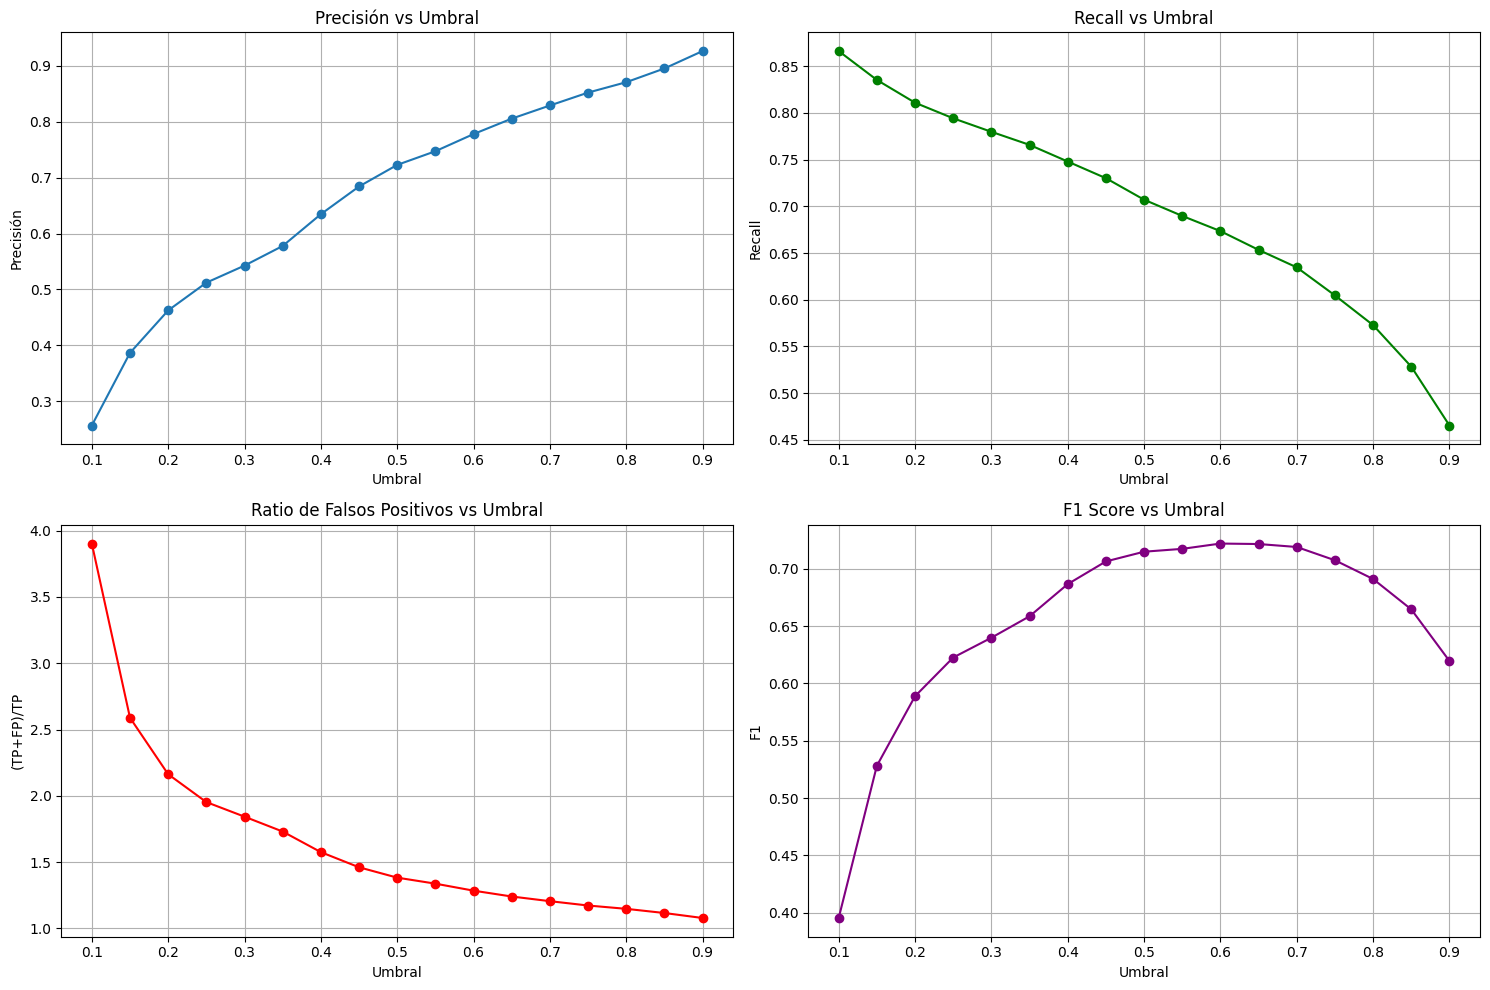


Umbral óptimo recomendado: 0.6500000000000001
Con este umbral, se obtienen los siguientes resultados:
Precisión: 0.8057
Recall: 0.6534
F1 Score: 0.7216
FP Ratio: 1.2411
TP: 2895, FP: 698, FN: 1536


In [ ]:
# Visualizar el efecto del umbral
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], marker='o')
plt.title('Precisión vs Umbral')
plt.xlabel('Umbral')
plt.ylabel('Precisión')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(threshold_df['Threshold'], threshold_df['Recall'], marker='o', color='green')
plt.title('Recall vs Umbral')
plt.xlabel('Umbral')
plt.ylabel('Recall')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(threshold_df['Threshold'], threshold_df['FP Ratio'], marker='o', color='red')
plt.title('Ratio de Falsos Positivos vs Umbral')
plt.xlabel('Umbral')
plt.ylabel('(TP+FP)/TP')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(threshold_df['Threshold'], threshold_df['F1'], marker='o', color='purple')
plt.title('F1 Score vs Umbral')
plt.xlabel('Umbral')
plt.ylabel('F1')
plt.grid(True)

plt.tight_layout()
plt.savefig('umbral_optimization.png')
plt.show()

# Encontrar un buen equilibrio entre recall y FP Ratio
threshold_df['balanced_score'] = threshold_df['Recall'] / threshold_df['FP Ratio']
best_threshold = threshold_df.loc[threshold_df['balanced_score'].idxmax(), 'Threshold']

print(f"\nUmbral óptimo recomendado: {best_threshold}")
print("Con este umbral, se obtienen los siguientes resultados:")
best_metrics = evaluate_all_metrics(y_test, y_pred_prob_best, best_threshold)
print(f"Precisión: {best_metrics['precision']:.4f}")
print(f"Recall: {best_metrics['recall']:.4f}")
print(f"F1 Score: {best_metrics['f1_score']:.4f}")
print(f"FP Ratio: {best_metrics['fp_ratio']:.4f}")
print(f"TP: {best_metrics['tp']}, FP: {best_metrics['fp']}, FN: {best_metrics['fn']}")